<h1 style="text-align:center;font-size:50px;">DBSCAN Algorithm</h1>

# Imports 👇

In [1]:
import pandas
import numpy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn
import matplotlib.pyplot as pyplot

##### 👇 setting the matplotlib configurations

In [2]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

# Data Reading 👇

In [11]:
data=pandas.read_csv('./Crop_Suggestion.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [12]:
data.columns

Index(['temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [14]:
data['label'].value_counts()

rice          100
maize         100
cotton        100
coconut       100
orange        100
apple         100
watermelon    100
jute          100
mango         100
coffee        100
Name: label, dtype: int64

In [15]:
data

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
995,26.774637,66.413269,177.774507,coffee
996,27.417112,56.636362,127.924610,coffee
997,24.131797,67.225123,173.322839,coffee
998,26.272418,52.127394,127.175293,coffee


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1000 non-null   float64
 1   humidity     1000 non-null   float64
 2   rainfall     1000 non-null   float64
 3   label        1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [17]:
data.describe()

,temperature,humidity,rainfall
count,1000.000000,1000.000000,1000.000000
mean,25.017344,78.038307,127.851236
std,3.808391,14.857447,56.785011
min,10.010813,45.022364,40.126504
25%,23.113147,67.087637,90.413542
50%,24.971106,81.979157,111.777864
75%,26.681848,90.918003,169.861544
max,35.990097,99.981876,298.560117


In [69]:
data.corr()

,temperature,humidity,rainfall
temperature,1.000000,-0.312575,-0.006793
humidity,-0.312575,1.000000,0.140620
rainfall,-0.006793,0.140620,1.000000


# Data Visualization 👇

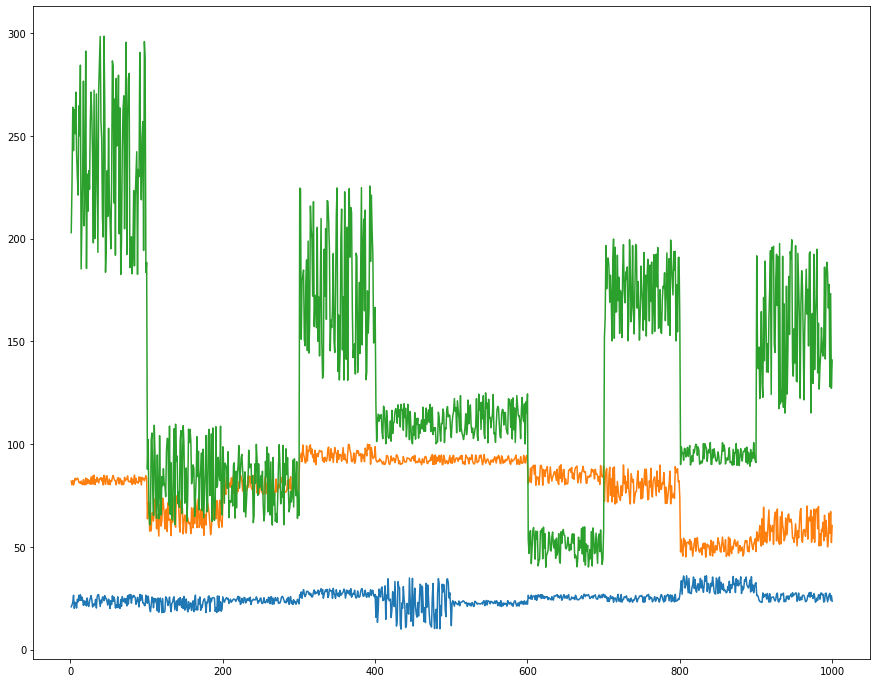

In [73]:
pyplot.plot([i for i in range(1,len(data)+1)],data[['temperature','humidity','rainfall']])

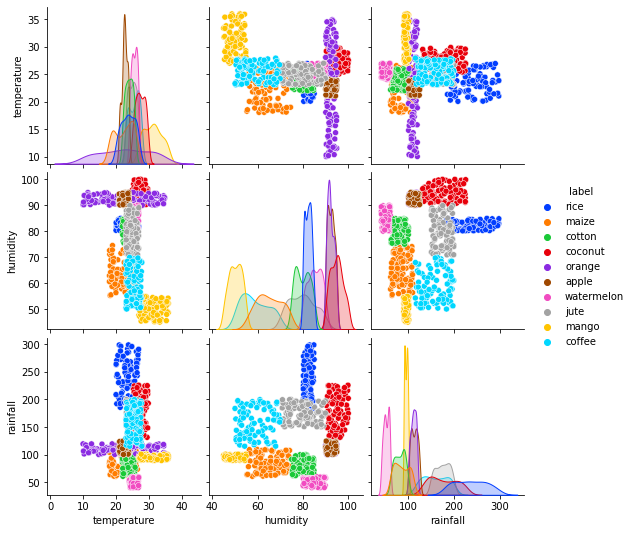

In [20]:
seaborn.pairplot(data.iloc[:,:4], hue="label",palette="bright")

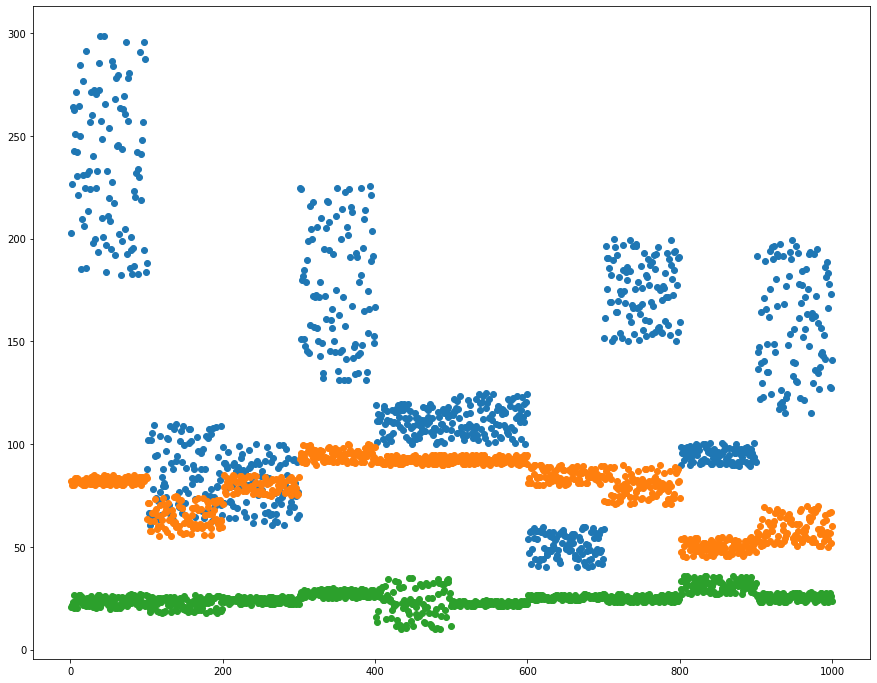

In [22]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['rainfall'])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['humidity'])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['temperature'])

<h1 style="text-align:center;font-size:50px;">Data Tranfomation</h1>

# Standization

In [23]:
standard_scaler = StandardScaler()

In [24]:
data_scaled=standard_scaler.fit_transform(data.iloc[:,:3])

In [25]:
data_scaled

array([[-1.0869869 ,  0.26696518,  1.32291723],
       [-0.85298685,  0.15362524,  1.74084213],
       [-0.52880403,  0.28838056,  2.39818775],
       ...,
       [-0.23264172, -0.72815967,  0.80116837],
       [ 0.32971983, -1.74484061, -0.01190951],
       [-0.37155755, -1.1880008 ,  0.23056001]])

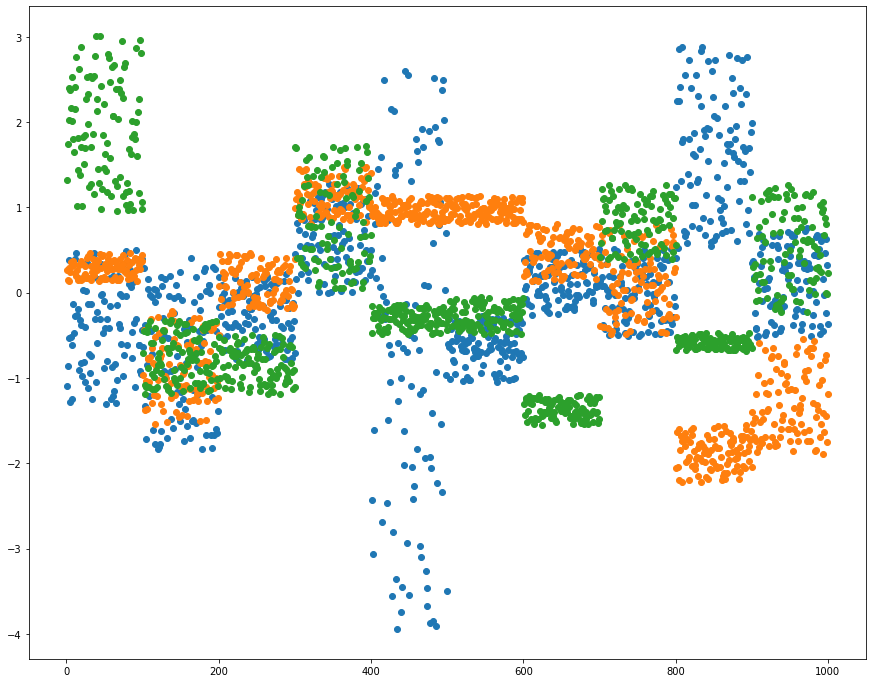

In [26]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_scaled[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_scaled[:,1])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_scaled[:,2])

# Normalization

In [27]:
data_normalized = normalize(data_scaled)

In [28]:
data_normalized

array([[-0.62726689,  0.15405744,  0.76341506],
       [-0.43862939,  0.07899834,  0.8951891 ],
       [-0.21385944,  0.11662715,  0.96987744],
       ...,
       [-0.21008995, -0.65757349,  0.72350489],
       [ 0.18567808, -0.98258774, -0.00670671],
       [-0.29350743, -0.93844698,  0.18212812]])

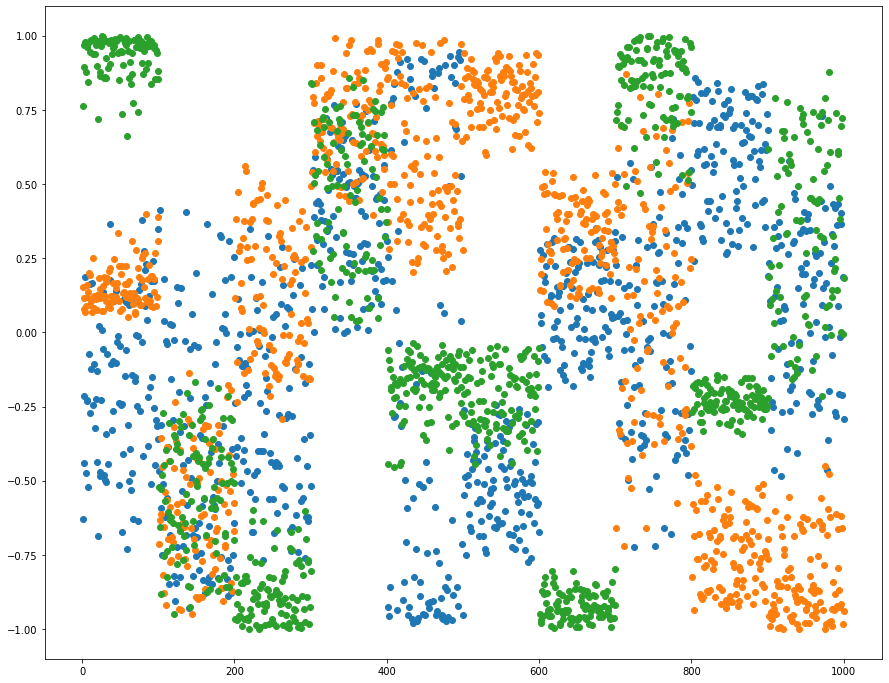

In [29]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_normalized[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_normalized[:,1])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_normalized[:,2])

# Dimentiality Reduction by PCA

In [30]:
Principal_Component_Analyser=PCA(n_components=2)

In [31]:
Component_Data=Principal_Component_Analyser.fit_transform(data_normalized[:,:3])

In [32]:
Component_Data

array([[ 0.7041781 , -0.29665556],
       [ 0.86138096, -0.17081719],
       [ 0.96934023, -0.13897398],
       ...,
       [ 0.71388281,  0.60532418],
       [ 0.04571377,  1.06017393],
       [ 0.16168011,  0.86320298]])

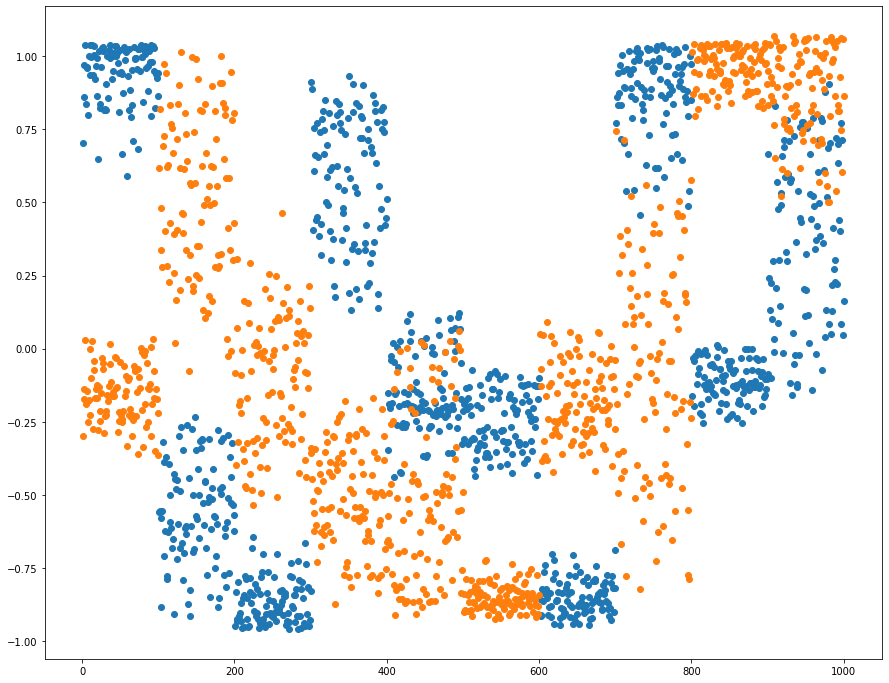

In [33]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=Component_Data[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=Component_Data[:,1])

# Creating the DBSCAN instance👇

In [49]:
DBSCAN_Model=DBSCAN(eps=0.08,min_samples=10)

### fitting the model 👇

In [50]:
DBSCAN_Model.fit(Component_Data[:,:2])

DBSCAN(eps=0.08, min_samples=10)

In [51]:
set(list(DBSCAN_Model.labels_))

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [52]:
Transformed_data=pandas.DataFrame({
    "column1_by_PCA":Component_Data[:,0],
    "column2_by_PCA":Component_Data[:,1],
    "predicted_cluster_by_DBSCAN":DBSCAN_Model.labels_,
})

In [53]:
Transformed_data

,column1_by_PCA,column2_by_PCA,predicted_cluster_by_DBSCAN
0,0.704178,-0.296656,0
1,0.861381,-0.170817,0
2,0.969340,-0.138974,0
3,1.038272,0.030710,0
4,0.837692,-0.190167,0
...,...,...,...
995,0.772521,0.748462,6
996,0.086292,1.063784,2
997,0.713883,0.605324,-1
998,0.045714,1.060174,2


In [54]:
Transformed_data['predicted_cluster_by_DBSCAN'].value_counts()

 0    200
 3    196
-1    194
 4    169
 2    143
 6     24
 1     21
 5     21
 9     12
 8     10
 7     10
Name: predicted_cluster_by_DBSCAN, dtype: int64

<AxesSubplot:>

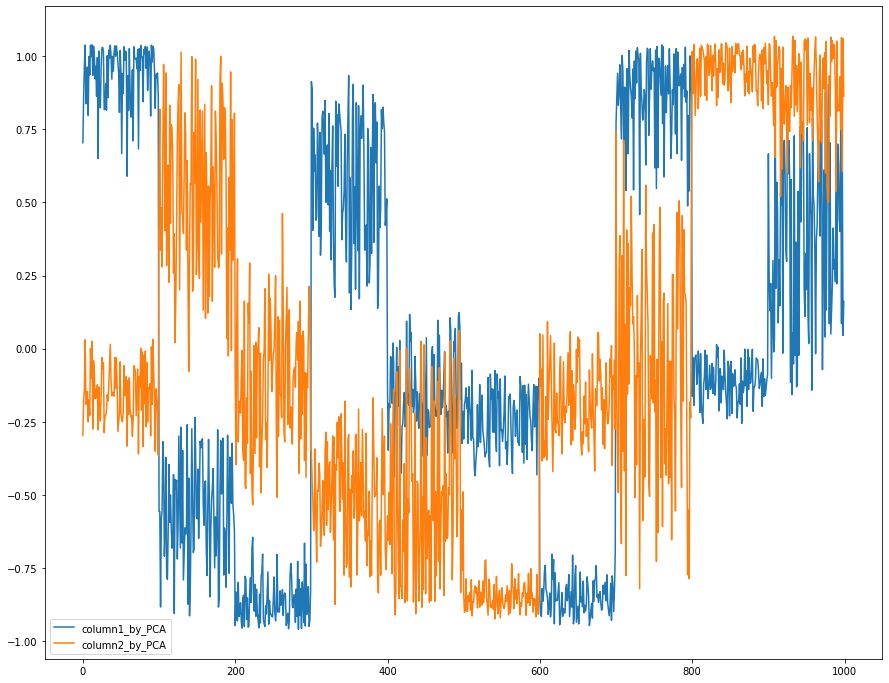

In [55]:
Transformed_data.iloc[:,:2].plot()

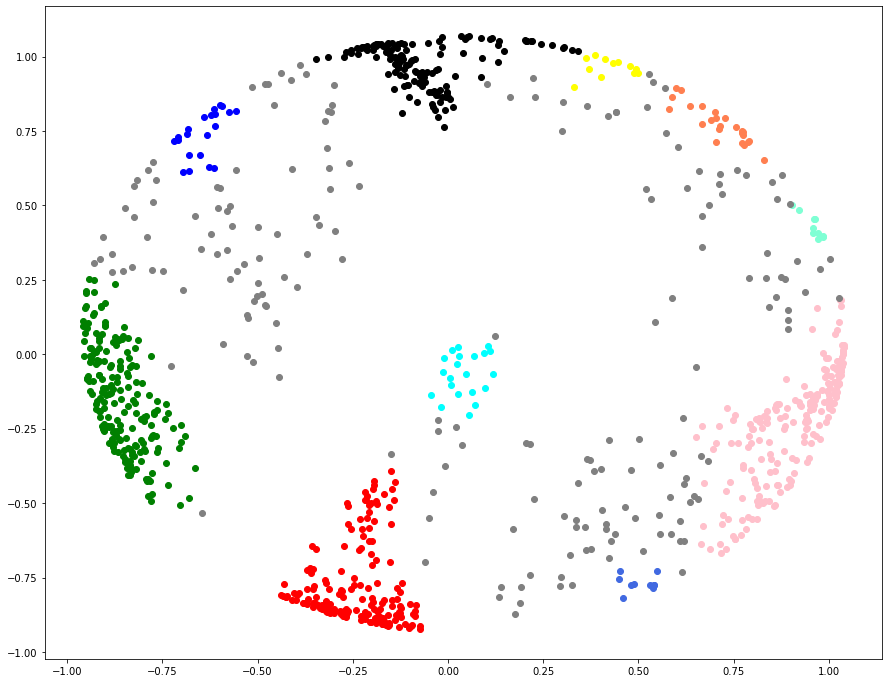

In [77]:
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==1].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==1].iloc[:,1],c='blue')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==0].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==0].iloc[:,1],c='pink')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==2].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==2].iloc[:,1],c="black")
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==3].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==3].iloc[:,1],c='green')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==4].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==4].iloc[:,1],c='red')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==5].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==5].iloc[:,1],c='aqua')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==6].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==6].iloc[:,1],c='coral')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==7].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==7].iloc[:,1],c='aquamarine')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==8].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==8].iloc[:,1],c='royalblue')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==9].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==9].iloc[:,1],c='yellow')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==-1].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==-1].iloc[:,1],c='gray')

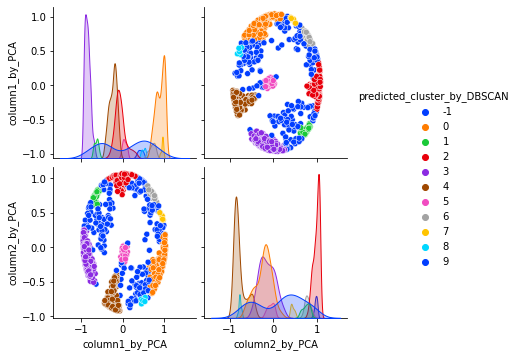

In [67]:
seaborn.pairplot(Transformed_data.iloc[:,:3], hue="predicted_cluster_by_DBSCAN",palette="bright")